<a href="https://colab.research.google.com/github/Bu64p/TensorFlow/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

Predicting a numerical variable based on some other combination of variables.
(Predicting a number)


Second Notebook

*By Engineer *Parsa Ghafoori Sadatieh**

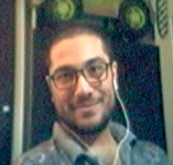

Ferdowsi universisty, Mashhad, Iran

*10/25/2024*

*8/4/1403*


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random
print("TensorFlow version: ",tf.__version__)
print("Keras version: ",keras.__version__)
print("Numpy version: ",np.__version__)
print("Pandas version: ",pd.__version__)

TensorFlow version:  2.17.0
Keras version:  3.4.1
Numpy version:  1.26.4
Pandas version:  2.2.2


## Create data to view and fit

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([ 0.4604257 ,  0.514933  , -0.06519881, -1.442522  , -0.48492542,
        -1.8364043 ,  0.91463274,  0.5145402 ,  0.5517507 , -0.3741098 ,
        -0.28709963,  1.5089895 , -0.14833727, -1.2846565 ,  0.5484313 ,
         0.10596129,  0.21793836,  0.7063839 , -0.19219153,  1.1390278 ],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([  3.5031984,   3.066252 ,  -1.0306686,  -9.081432 ,  -2.81831  ,
        -12.10474  ,   5.5677333,   3.0807905,   3.3131256,  -2.0764089,
         -2.2106946,   9.909638 ,  -1.1213106,  -8.161384 ,   4.2567706,
          1.1711786,   1.8290083,   3.8009567,  -1.8430763,   7.3766603],
       dtype=float32)>)

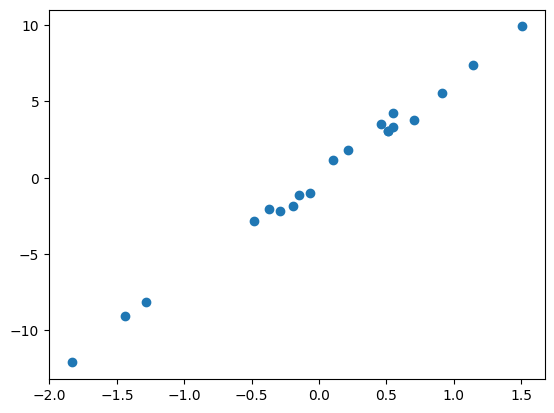

In [2]:
number_of_samples = 20
nise_offset = 0.5
# Create features
X = tf.random.Generator.from_seed(64)
X = X.normal(shape=[number_of_samples])
X = tf.cast(X, dtype=tf.float32)

# Create labels
Y = tf.random.Generator.from_seed(64)
Y = Y.normal(shape=[number_of_samples])
Y = tf.cast(Y, dtype=tf.float32)
Y = tf.multiply(Y, 6.4)

# add noise
N = tf.random.normal(shape=[number_of_samples])
N = tf.cast(N, dtype=tf.float32)
N = tf.multiply(N, nise_offset)

Y = tf.add(Y, N)

# Visualize
plt.scatter(X, Y)
X , Y

## Input & Output shapes

In [3]:
# Create a demo
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

# Check the shape
tf.shape(house_info).numpy(), tf.shape(house_price).numpy()

(array([3], dtype=int32), array([1], dtype=int32))

In [4]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

(TensorShape([20]), TensorShape([20]))

In [5]:
X.ndim, Y.ndim # so it's a scaler! (1,1)

(1, 1)

## Steps in modelling with TensorFlow



1.   Creating a model: define the input and output layers, as well as the hidden layers of a deep learning the model.

2.   Compiling a model: define the loss function (the function tell how wrong the model is) and the optimizer (tell how to improve the patterns that the model is learning) and evaluation metrics (what we can use to interpret the performance of our model).

3.  Fitting a model: letting the model try to find patterns between X & y (features and labels).

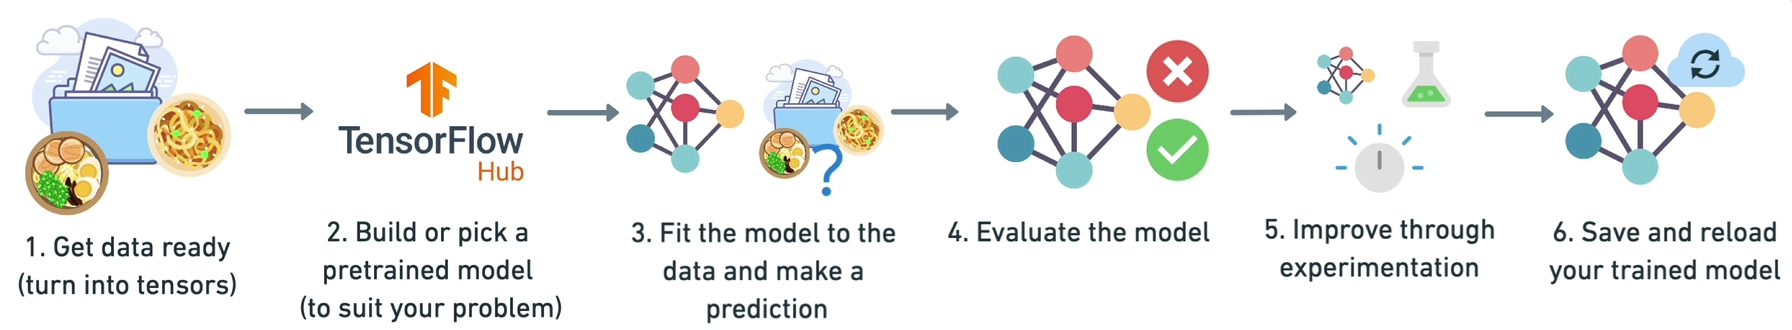


In [6]:
# Set random seed
tf.random.set_seed(64)

# 1.Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# or: model_t = tf.keras.Sequential()
#     model_t.add(tf.keras.layers.Dense(1))


# 2.Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is Mean Absolute Error
             optimizer=tf.keras.optimizers.SGD(), # sgd is Stochasitc gradient descent
              #or using: optimizer="sgd"
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step - loss: 5.0191 - mae: 5.0191
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.0146 - mae: 5.0146
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.0100 - mae: 5.0100
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5.0055 - mae: 5.0055
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.0010 - mae: 5.0010
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.9965 - mae: 4.9965
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.9920 - mae: 4.9920
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.9874 - mae: 4.9874
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.9829 - mae: 4.9829
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.9784 - mae: 4.9784


> 1. MAE stands for Mean Absolute Error.
It is a metric that measures the average absolute difference between the predicted and actual values in a regression problem.


> 2. SGD stands for Stochastic Gradient Descent.
It's an optimization algorithm used to update a model's parameters during training to minimize the loss function and improve accuracy.
Instead of using the entire dataset to compute the gradient, it uses a small random subset (mini-batch) which makes it faster and more efficient for large datasets.



> 3. An epoch is one complete pass through the entire training dataset when training a machine learning model. It's like showing your model all your training data once.






In [7]:
# Try and make a predicition
#X_test = random.choice(X) # Assuming X is a list or similar iterable
#X_test = np.array([X_test])
Xi = 3
input_data = tf.expand_dims(tf.expand_dims(X[Xi], axis=0), axis=-1)
Y_pred = tf.constant(model.predict(input_data))
#print(tf.expand_dims(model.predict([X_test]),axis=-1
input_data.numpy()[0][0], Y[Xi].numpy(),Y_pred.numpy()[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


(-1.442522, -9.081432, 1.3305573)

## Improving the model
Model can be improved by altering the steps of creating a model.

1. **Create a model**: Add more layers, increase the number of hiden layers, chnage the activation function of each layer.

2. **Compiling a model**: Change the optimization function or the **learning rate** of the optimization function.

3. **Fitting a model**: fit a model for more **epochs** (leave it training for longer) or on more date (give the model more example to learn from)

In [8]:
# 1.Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
               #optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               optimizer="sgd",
               metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 4.7043 - mae: 4.7043
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.6998 - mae: 4.6998
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.6952 - mae: 4.6952
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.6907 - mae: 4.6907
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.6862 - mae: 4.6862
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 4.6817 - mae: 4.6817
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.6771 - mae: 4.6771
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.6726 - mae: 4.6726
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.6681 - mae: 4.6681
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.6636 - mae: 4.6636
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.6591 - mae: 4.6591
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.6545 - mae: 4.6545
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/st

In [9]:
# Try and make a predicition
input_data = tf.expand_dims(tf.expand_dims(X[Xi], axis=0), axis=-1)
Y_pred = tf.constant(model.predict(input_data))
#print(tf.expand_dims(model.predict([X_test]),axis=-1
input_data.numpy()[0][0], Y[Xi].numpy(),Y_pred.numpy()[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(-1.442522, -9.081432, -0.12566043)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
    ])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.6029 - mae: 4.6029
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.4833 - mae: 4.4833
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.3650 - mae: 4.3650
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4.2476 - mae: 4.2476
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 4.1306 - mae: 4.1306
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 4.0134 - mae: 4.0134
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3.8958 - mae: 3.8958
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3.7773 - mae: 3.7773
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3.6576 - mae: 3.6576
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 3.5363 - mae: 3.5363
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.4133 - mae: 3.4133
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.2943 - mae: 3.2943
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step 

In [11]:
# Try and make a predicition
input_data = tf.expand_dims(tf.expand_dims(X[Xi], axis=0), axis=-1)
Y_pred = tf.constant(model.predict(input_data))
#print(tf.expand_dims(model.predict([X_test]),axis=-1
input_data.numpy()[0][0], Y[Xi].numpy(),Y_pred.numpy()[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


(-1.442522, -9.081432, -9.179083)



> **Learning rate** is the most *important* hyper parameter to change!



## Evaluating a model

In practice, a typical workflow to building neural networks would be:

```
Build a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it ->...
```

3 words to memorize:
> "Visualize,Visualize,Visualize"

* Data, Model and Predicition

### The 3 sets...

* **Training set**: the model learns from this data, which is typically 70-80% of the total data that is available.

* **Validation set**: the model gets tuend on this data,  which is typically 10-15% of the total data that is available.

* **Test set**: the model gets evaluated on this data to set, which is typically 10-15% of the total data that is available.

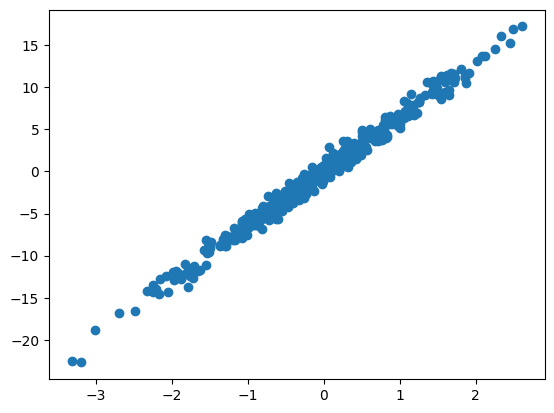

In [12]:
#Data set for testing:
number_of_samples = 400
nise_offset = 0.8
# Create features
X = tf.random.Generator.from_seed(85)
X = X.normal(shape=[number_of_samples])
X = tf.cast(X, dtype=tf.float32)

# Create labels
Y = tf.random.Generator.from_seed(85)
Y = Y.normal(shape=[number_of_samples])
Y = tf.cast(Y, dtype=tf.float32)
Y = tf.multiply(Y, 6.4)

# add noise
N = tf.random.normal(shape=[number_of_samples])
N = tf.cast(N, dtype=tf.float32)
N = tf.multiply(N, nise_offset)

Y = tf.add(Y, N)

# Visualize
plt.scatter(X, Y)


In [13]:
 #Split the data
X_train = X[:int(number_of_samples*0.8)] # 80% of data, data is random, no need to
Y_train = Y[:int(number_of_samples*0.8)]

X_test = X[int(number_of_samples*0.8):]  # 20% of data
Y_test = Y[int(number_of_samples*0.8):]

len(X_train),len(Y_train),len(X_test),len(Y_test)

(320, 320, 80, 80)

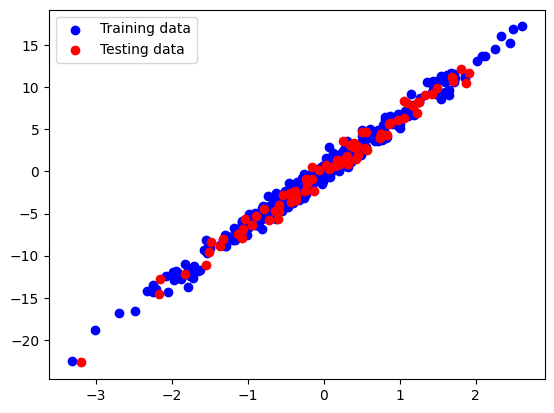

In [14]:
#plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train, c="b",label="Training data")
plt.scatter(X_test,Y_test, c="r",label="Testing data")
plt.legend();

In [15]:
# 1.create a model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(50,name="hiden_layer1"),
    tf.keras.layers.Dense(50,name="hiden_layer2"),
    tf.keras.layers.Dense(50,name="hiden_layer3"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="My_model1")

# 2.compile th model
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
               metrics=["mae"]

)
# 3.train the model
model2.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=150)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.6492 - mae: 4.6492
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6976 - mae: 2.6976 
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8266 - mae: 0.8266 
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7404 - mae: 0.7404 
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7116 - mae: 0.7116
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6925 - mae: 0.6925  
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6390 - mae: 0.6390  
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6255 - mae: 0.6255 
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6127 - mae: 0.6127 
Epoch 10/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6123 - mae: 0.6123 
Epoch 11/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6076 - mae: 0.6076 
Epoch 12/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6118 - mae: 0.6118 
Epoch 13/150
10/10 ━━━━━━━━━━━━━━━━━━

### Visualizing the model   

In [16]:
model2.summary()

Model: "My_model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiden_layer1 (Dense)                 │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiden_layer2 (Dense)                 │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiden_layer3 (Dense)                 │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,165 (67.05 KB)

 Trainable params: 5,721 (22.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,444 (44.71 KB)

* **Total params**: total number of parameters in the model.
* **Trainable params**: number of parameters(patterns) in the model that can be trained.
* **Non-trainable params**: number of parameters in the model that cannot be trained.(Transfer Learning)

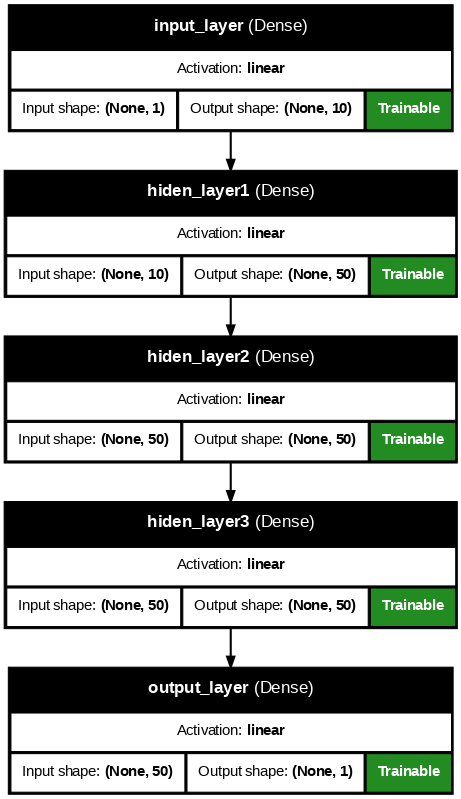

In [17]:
plot_model(model=model2,show_shapes=True,show_layer_names=True,expand_nested=True,dpi=75,show_trainable=True,show_layer_activations=True)

### Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.



In [18]:
Y_pred = model2.predict(X_test)
Y_pred , Y_test

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


(array([[ -4.0592847 ],
        [  8.22181   ],
        [  1.0739492 ],
        [ -2.403522  ],
        [ -0.7822128 ],
        [  1.1956278 ],
        [ -1.3150735 ],
        [ -0.35907096],
        [  2.06917   ],
        [ -4.589408  ],
        [  0.49808517],
        [  4.9445405 ],
        [  5.7635145 ],
        [  8.695642  ],
        [ -5.047773  ],
        [  9.723029  ],
        [ 12.192446  ],
        [  4.970515  ],
        [ 12.458134  ],
        [ -3.8648243 ],
        [  1.695729  ],
        [ 11.107575  ],
        [ -9.70783   ],
        [  2.1468892 ],
        [  8.072798  ],
        [  8.113255  ],
        [ -3.3755612 ],
        [  3.6513848 ],
        [  5.43604   ],
        [  0.24804063],
        [  7.1759152 ],
        [ -6.95342   ],
        [  3.7850342 ],
        [  9.283305  ],
        [  2.5605507 ],
        [-13.992077  ],
        [  1.733144  ],
        [ -2.7196107 ],
        [  7.699147  ],
        [  2.3528914 ],
        [ -2.279908  ],
        [-20.625

In [92]:
def plot_pred(
    train_data,
    train_labels,
    test_data,
    test_labels,
    pred):

    plt.grid(True)
    plt.scatter(train_data,train_labels,c="b",label="Training data")
    plt.scatter(test_data,test_labels,c="r",label="Testing data")
    plt.scatter(test_data,pred,c="g",label="Predictions")
    plt.legend();
    plt.xlabel("Input data")
    plt.ylabel("Target labels")
    plt.title("Input data vs Target labels vs Predictions")



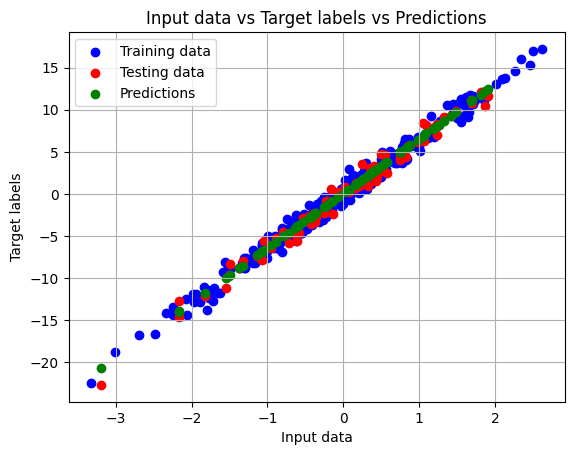

In [93]:
plot_pred(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    pred=Y_pred)

### Evaluating model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"


In [21]:
# evaluate the model on the test
model2.evaluate(tf.expand_dims(X_test,axis=-1),Y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6378 - mae: 0.6378  


[0.6439528465270996, 0.6439528465270996]

In [22]:
Y_pred.shape , Y_test.shape

((80, 1), TensorShape([80]))

In [23]:
# calculate mae
#Y_pred=tf.squeeze(Y_pred) # there is a extra dimension!
tf.keras.losses.MAE(y_true=Y_test,y_pred=tf.squeeze(Y_pred)).numpy()

0.64395285

In [24]:
# calculate mse
tf.keras.losses.MSE(y_true=Y_test,y_pred=tf.squeeze(Y_pred)).numpy()

0.66977274

In [25]:
def mae(y_true,y_pred):
    return tf.keras.losses.MAE(y_true=Y_test,y_pred=tf.squeeze(y_pred)).numpy()

def mse(y_true,y_pred):
    return tf.keras.losses.MSE(y_true=Y_test,y_pred=tf.squeeze(y_pred)).numpy()


### Running experiments to improve our model

`Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...`

1. **Get more data**: get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. **Make your model larger (using a more complex model)**:this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer**: give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

*   `model_1` - same as the original model, 1 layer, trained for 100 epochs
*  `model_2` - 2 layers, trained for 100 epochs
* `model_3` - 2 layers, trained for 900 epochs


## **Build `model_1`**

In [26]:
# 1. create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. train the model
model_1.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8655 - mae: 6.8655  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7971 - mae: 6.7971 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7287 - mae: 6.7287 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6602 - mae: 6.6602 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5918 - mae: 6.5918 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5235 - mae: 6.5235 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4552 - mae: 6.4552 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3868 - mae: 6.3868 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3185 - mae: 6.3185 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2502 - mae: 6.2502 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1818 - mae: 6.1818 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1135 - mae: 6.1135 
Epoch 13/100
10/10 ━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


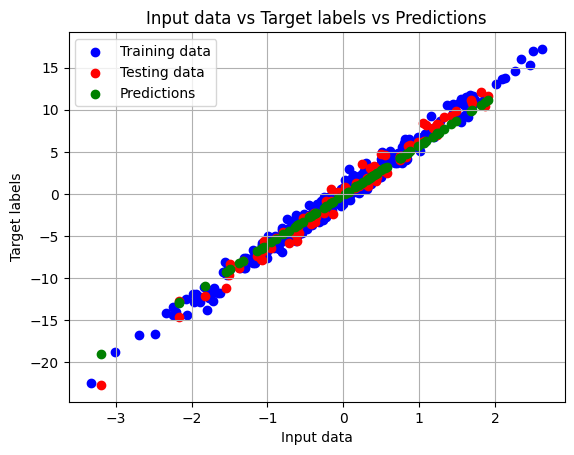

In [27]:
y_pred_1 = model_1.predict(X_test)
plot_pred(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    pred=y_pred_1)

In [28]:
# calculate model 1 evaluation metrics
mae_1 = mae(Y_test,y_pred_1)
mse_1 = mse(Y_test,y_pred_1)
mae_1,mse_1

(0.80016744, 1.0619822)

**Build `model_2`**

* 2 dense layers, traind for 100 epochs

In [29]:
# 1. create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

# 3. train the model
model_2.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5057 - mse: 31.9372  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3196 - mse: 29.3900 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1053 - mse: 26.5878 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8572 - mse: 23.5208 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5714 - mse: 20.2156 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2401 - mse: 16.6969 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8593 - mse: 13.0564 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4223 - mse: 9.4237  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9279 - mse: 6.0365 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3882 - mse: 3.2042  
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9074 - mse: 1.3888 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6803 - mse: 0.7161  
Epoch 13/100
1

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


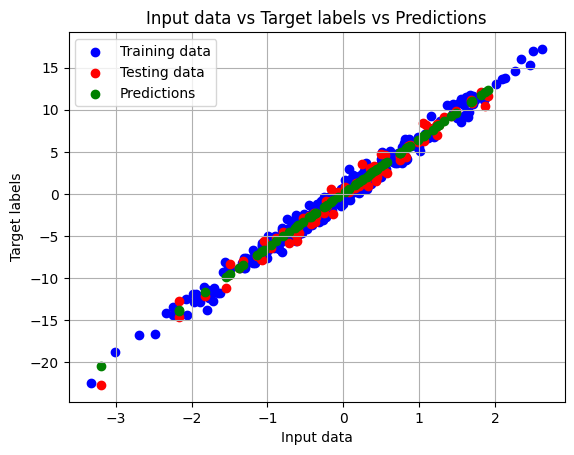

In [80]:
 y_pred_2 = model_2.predict(X_test)
plot_pred(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    pred=y_pred_2)

In [31]:
mae_2 = mae(Y_test,y_pred_2)
mse_2 = mse(Y_test,y_pred_2)
mae_2,mse_2

(0.65153617, 0.67924196)

**Build `model_3`**

* 2 dense layers, traind for 500 epochs

In [32]:
# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

# 3. train the model
model_3.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100)#900)



Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3199 - mse: 44.3508  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2998 - mse: 44.0202 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2763 - mse: 43.6355 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2489 - mse: 43.1874 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2167 - mse: 42.6652 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1789 - mse: 42.0568 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1346 - mse: 41.3486 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0826 - mse: 40.5251 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0216 - mse: 39.5689 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9499 - mse: 38.4608 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8656 - mse: 37.1796 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7667 - mse: 35.7029 
Epoch 13/100

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


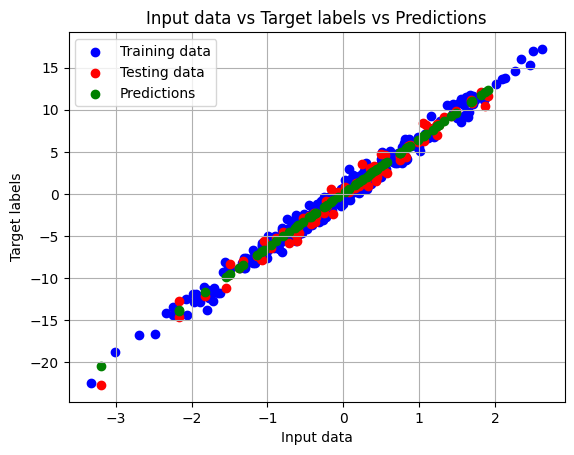

In [33]:
 y_pred_3 = model_3.predict(X_test)
plot_pred(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    pred=y_pred_3)

In [34]:
mae_3 = mae(Y_test,y_pred_3)
mse_3 = mse(Y_test,y_pred_3)
mae_3,mse_3

(0.6517154, 0.6795972)

# Comparing the results of our experiments

We've run a few experiments, let's compare the results.


In [35]:
model_results = [["model_1",mae_1,mse_1],
                 ["model_2",mae_2,mse_2],
                 ["model_3",mae_3,mse_3]]

all_results = pd.DataFrame(model_results, columns=["Model","MAE","MSE"])
all_results

,Model,MAE,MSE
0,model_1,0.800167,1.061982
1,model_2,0.651536,0.679242
2,model_3,0.651715,0.679597


 Looks like `model_2` performed the best...

> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: **"experiment, experiment, experiment"**.

## Save the models

Saving the models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format


In [36]:
# save the model using the SaveModel format
model_2.save("Best_Model_SM.keras")

In [37]:
# save the model using the HDF5 format
model_2.save("Best_Model_HDF5.h5")

## Loading in a saved model

In [38]:
loaded_SM = tf.keras.models.load_model("/content/Best_Model_SM.keras")
loaded_SM.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (32, 1)                     │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 1)                     │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [39]:
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (32, 1)                     │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 1)                     │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [40]:
# Compare m2 w/ sm format
model_2_pred = model_2.predict(X_test)
loaded_SM_pred = loaded_SM.predict(X_test)
model_2_pred == loaded_SM_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [41]:
loaded_H5 = tf.keras.models.load_model("/content/Best_Model_HDF5.h5")
loaded_H5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (32, 1)                     │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 1)                     │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [42]:
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (32, 1)                     │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 1)                     │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [43]:
# Compare m2 w/ h5 format
model_2_pred = model_2.predict(X_test)
loaded_H5_pred = loaded_H5.predict(X_test)
model_2_pred == loaded_H5_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

 ## A larger example

In [44]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [46]:
oh_data = pd.get_dummies(insurance,dtype=int)

In [47]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
x_data = oh_data.drop("charges",axis=1)
y_data = oh_data["charges"]

In [49]:
x_data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=64)
len(x_data),len(x_train),len(x_test)

(1338, 1070, 268)

In [51]:
# create a model
model_a = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_a.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=["mae"]
)

# train the model
model_a.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13026.2646 - mae: 13026.2646
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13013.7041 - mae: 13013.7041
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13000.5977 - mae: 13000.5977
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12986.1289 - mae: 12986.1289
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12969.6436 - mae: 12969.6436
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12950.7510 - mae: 12950.7510
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12929.2051 - mae: 12929.2051
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12904.8213 - mae: 12904.8213
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12877.4316 - mae: 12877.4316
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12846.8662 - mae: 12846.8662
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12812.9707 - mae: 12812.9707
Epoch 12/100
34/34 ━━━━━━━━━━━

In [52]:
model_a.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6588.7710 - mae: 6588.7710  


[6959.859375, 6959.859375]

In [53]:
y_train.mean(),y_train.median()

(13415.346024886916, 9565.00995)

It looks like the model is not performing well...
Let's try and improve it!

To (try) improve the model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and use Adam optimizer
2. train for longer

In [54]:
# create a model
model_b = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_b.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=["mae"]
)

# train the model
model_b.fit(x_train,y_train,epochs=150, verbose = 1)

Epoch 1/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12959.6250 - mae: 12959.6250
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12776.2939 - mae: 12776.2939
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12399.8652 - mae: 12399.8652
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11677.0605 - mae: 11677.0605
Epoch 5/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10501.8047 - mae: 10501.8047
Epoch 6/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9054.3125 - mae: 9054.3125
Epoch 7/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7804.6104 - mae: 7804.6104
Epoch 8/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7272.6968 - mae: 7272.6968
Epoch 9/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7199.5430 - mae: 7199.5430
Epoch 10/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7180.4028 - mae: 7180.4028
Epoch 11/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7155.4634 - mae: 7155.4634
Epoch 12/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [55]:
model_b.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3242.1453 - mae: 3242.1453  


[3344.908203125, 3344.908203125]

In [56]:
model_a.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6588.7710 - mae: 6588.7710 


[6959.859375, 6959.859375]

In [57]:
# create a model
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# compile the model
model_c.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

# fit the model
history = model_c.fit(x_train,y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12971.8340 - mae: 12971.8340
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12799.6436 - mae: 12799.6436 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12450.3818 - mae: 12450.3818 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11765.9209 - mae: 11765.9209 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10620.3008 - mae: 10620.3008 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9163.4209 - mae: 9163.4209 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7863.6411 - mae: 7863.6411 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7280.4385 - mae: 7280.4385 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7198.2344 - mae: 7198.2344 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7178.7383 - mae: 7178.7383 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7153.4009 - mae: 7153.4009
Epoch 12/200
34/34 ━━━━━━━━━━━━━━

In [58]:
model_c.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3206.8281 - mae: 3206.8281  


[3263.237060546875, 3263.237060546875]

In [59]:
model_b.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3242.1453 - mae: 3242.1453 


[3344.908203125, 3344.908203125]

Text(0.5, 0, 'epochs')

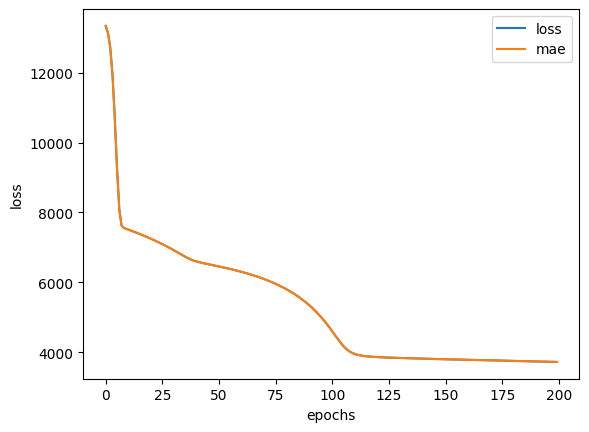

In [60]:
# plot history (aka a loss curve or a learning curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


> 🤔 Question: How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)
In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

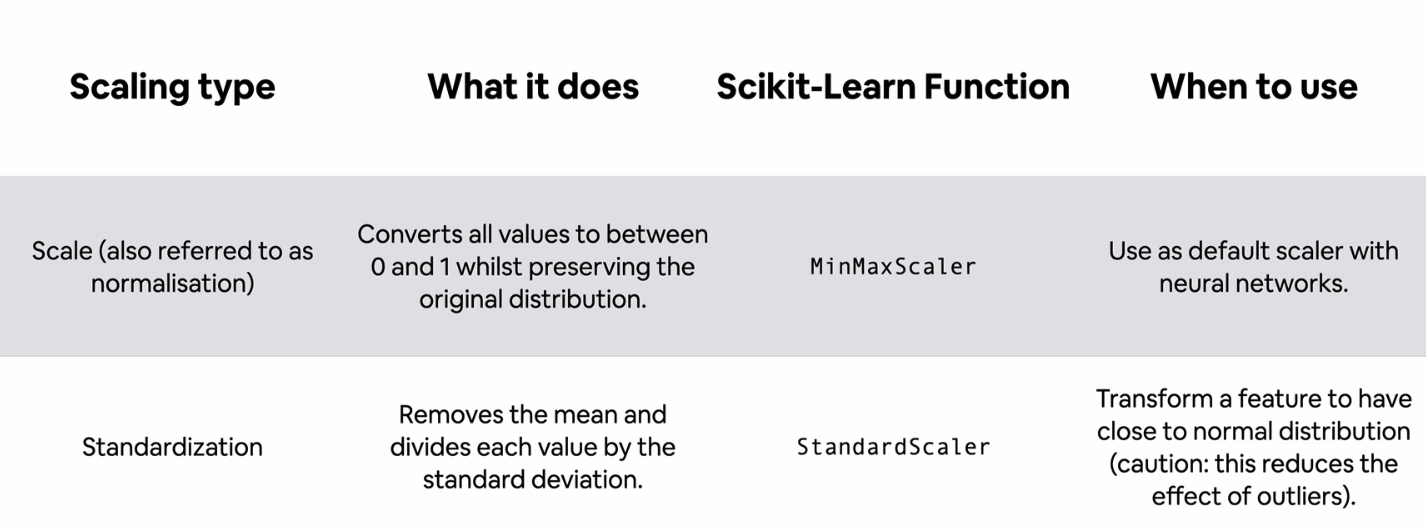

In [61]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

# read in insurance dataframe
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [62]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create column transformer
ct = make_column_transformer (
    (MinMaxScaler(),["age","bmi","children"]), # turn all values in these columns between 0 & 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
# create x & y

x = df.drop("charges",axis=1)
y = df["charges"]

# build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=64)

# fit the column transformer to our training data
ct.fit(x_train)

# transform training and test data with the column transformer
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [63]:
x_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [64]:
x_train_normal[0]

array([0.04347826, 0.63061609, 0.4       , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        ])

In [65]:
x_train.shape , x_train_normal.shape

((1070, 6), (1070, 11))

In [66]:
# create a model
model_d = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# compile the model
model_d.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

# fit the model

history = model_d.fit(x_train_normal,
            y_train,
            epochs=500,
            validation_data=(x_test_normal,y_test),
            callbacks=[early_stopping]
)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 13013.0703 - mae: 13013.0703 - val_loss: 12684.8252 - val_mae: 12684.8252
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13004.7744 - mae: 13004.7744 - val_loss: 12668.9160 - val_mae: 12668.9160
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12984.8242 - mae: 12984.8242 - val_loss: 12633.4883 - val_mae: 12633.4883
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12942.7070 - mae: 12942.7070 - val_loss: 12567.2959 - val_mae: 12567.2959
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12867.1396 - mae: 12867.1396 - val_loss: 12459.0332 - val_mae: 12459.0332
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12747.0420 - mae: 12747.0420 - val_loss: 12298.1738 - val_mae: 12298.1738
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12572.0830 - mae: 12572.0830 - val_loss: 12074.6377 - val_mae: 12074.6377
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12332.294

In [67]:
model_d.evaluate(x_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3153.1892 - mae: 3153.1892 


[3034.7978515625, 3034.7978515625]

Text(0.5, 0, 'epochs')

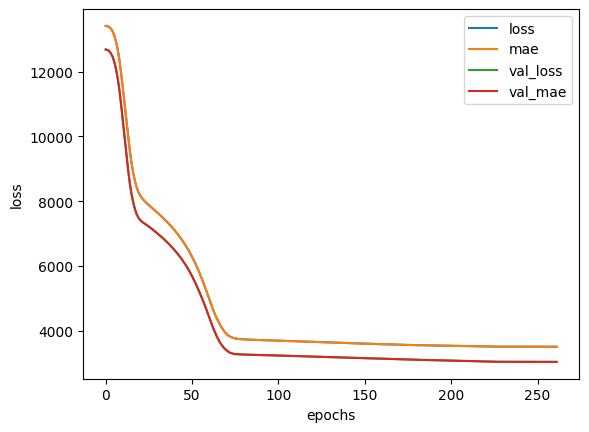

In [68]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Exercise:

## Boston Housing Dataset Explanation

### What is it?

> The Boston Housing dataset is a collection of data points about housing prices in Boston, Massachusetts. Each data point represents a different area within Boston and contains 13 features describing the area's characteristics (like crime rate, pollution levels, average number of rooms in houses, etc.) along with the median house price for that area.

### Why is it used?

> It's a classic dataset used in machine learning for regression tasks. Regression means predicting a continuous value (like price) based on other information. We use this dataset to train machine learning models to predict house prices based on the 13 features.

### Important Features:

* **CRIM**: Crime rate in the area
* **RM**: Average number of rooms per house
* **AGE**: Proportion of older houses
* **TAX**: Property tax rate
* **LSTAT**: Percentage of lower-income residents
* **MEDV** (Target): Median house price (what we're trying to predict)

### Regression with Boston Housing: In Short

1. ***Load the data***: Import the dataset using `tf.keras.datasets.boston_housing.load_data()`
2. ***Prepare the data***: Ensure the data is in the correct format for your model (like scaling values).
3. ***Create a model***: Build a regression model using TensorFlow/Keras (e.g., a neural network).
4. ***Train the model***: Feed the model the training data (features and prices) so it can learn patterns.
5. ***Evaluate the model***: Test the model on unseen data to see how accurately it predicts house prices.

### For Documentation:

> You can use the above points as a starting point and expand on them with more details and code examples. Emphasize the goal of regression (predicting house prices) and how the Boston Housing dataset provides the necessary data for this task.


In [69]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
!pip install livelossplot
from livelossplot import PlotLossesKeras


In [70]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv")

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [71]:
# create x & y
x = df.drop("medv",axis=1)
y = df["medv"]
# build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=64)

# let's normalize the data
ct = make_column_transformer(
    (MinMaxScaler(),["crim","zn","indus","chas","nox","age","dis","rad","tax","ptratio","b","lstat"]),# turn all values in these columns between 0 & 1
)
# fit the column transformer to our training data
ct.fit(x_train)

# transform training and test data with the column transformer
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

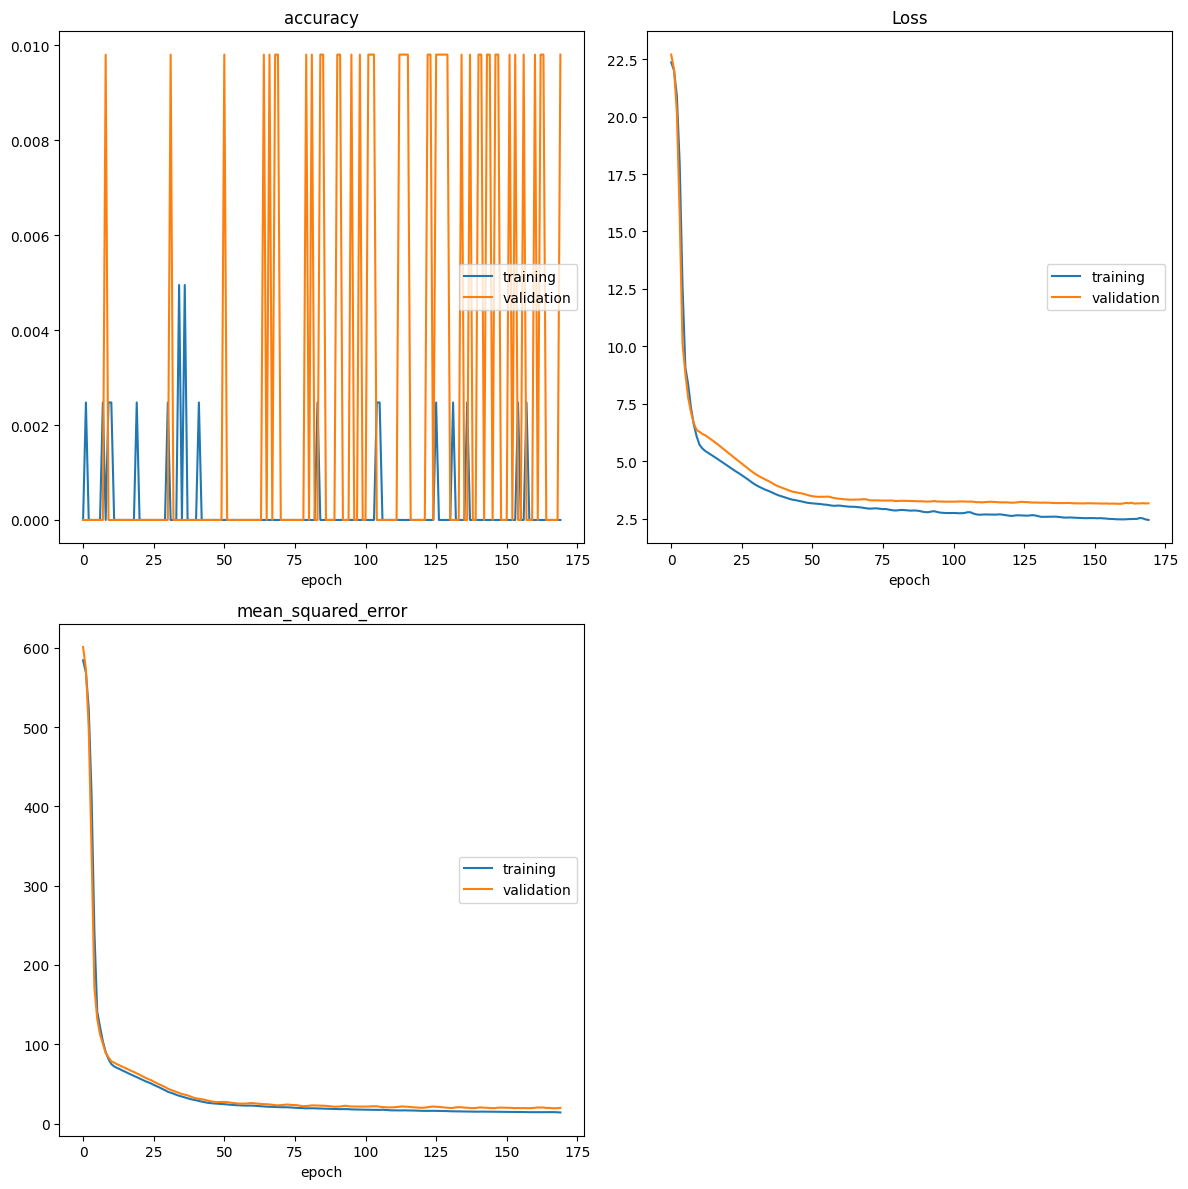

accuracy
	training         	 (min:    0.000, max:    0.005, cur:    0.000)
	validation       	 (min:    0.000, max:    0.010, cur:    0.010)
Loss
	training         	 (min:    2.438, max:   22.363, cur:    2.438)
	validation       	 (min:    3.139, max:   22.699, cur:    3.164)
mean_squared_error
	training         	 (min:   13.954, max:  584.300, cur:   13.954)
	validation       	 (min:   19.180, max:  600.929, cur:   19.716)
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.0000e+00 - loss: 2.4154 - mean_squared_error: 14.0978 - val_accuracy: 0.0098 - val_loss: 3.1644 - val_mean_squared_error: 19.7157


In [72]:
# create a model
model_e = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='linear')
])

# compile the model
model_e.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy', 'mean_squared_error'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# train the model
history = model_e.fit(x_train_normal,
                      y_train, epochs=500,
                      validation_data=(x_test_normal, y_test),
                      callbacks=[early_stopping,PlotLossesKeras()])

In [73]:
model_e.evaluate(x_test_normal,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0060 - loss: 2.9100 - mean_squared_error: 16.6129     


[3.164388418197632, 0.009803921915590763, 19.715742111206055]

Text(0.5, 0, 'epochs')

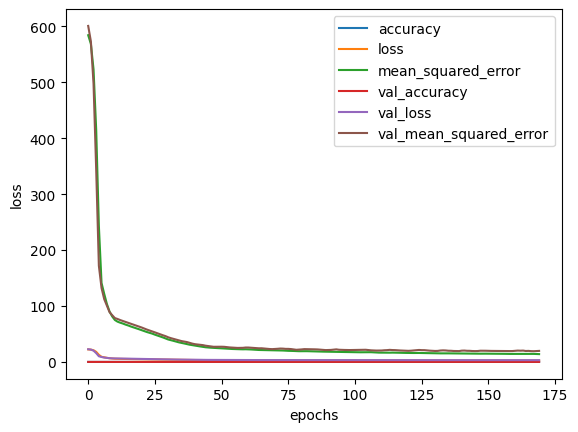

In [74]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [77]:
model_e.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 100)                 │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 100)                 │          10,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,502 (251.96 KB)

 Trainable params: 21,500 (83.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 43,002 (167.98 KB)

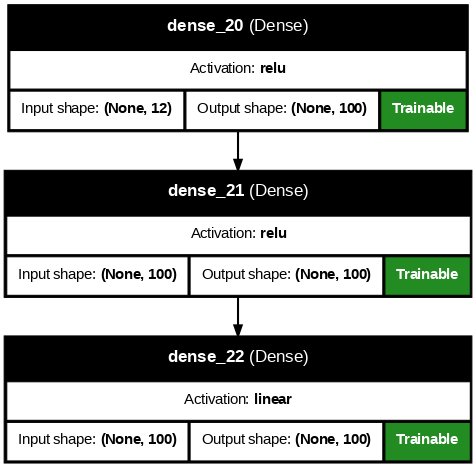

In [79]:
plot_model(model=model_e,show_shapes=True,show_layer_names=True,expand_nested=True,dpi=75,show_trainable=True,show_layer_activations=True)

In [75]:
model_e.save("BostonHousing.h5")

In [ ]:
|